# Importing Libraries [Step 1]

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Importing Dataset

In [2]:
# Check version of matplot
matplotlib.__version__

'3.7.2'

In [3]:
# Enable visualizations through matplot
%matplotlib inline

In [4]:
# Creating a path
path = r'C:\Users\mduong\Documents\Python Scripts'

In [5]:
# Import crime data CSV file
df_crime = pd.read_csv(os.path.join(path, 'denver_crimedata_2018-2023_cleaned.csv'), low_memory=False, index_col = False)

# Check Basic Information

In [6]:
# Show how many rows and columns are in the crime data dataframe(df)
df_crime.shape

(377793, 27)

In [7]:
# Show detailed information about the crime data df
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377793 entries, 0 to 377792
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               377793 non-null  int64  
 1   incident_id              377793 non-null  float64
 2   offense_id               377793 non-null  float64
 3   offense_code             377793 non-null  int64  
 4   offense_code_extension   377793 non-null  int64  
 5   crime                    377793 non-null  object 
 6   crime_category           377793 non-null  object 
 7   crime_startdate          377793 non-null  object 
 8   crime_yr                 377793 non-null  int64  
 9   day_of_week_first        377793 non-null  object 
 10  crime_enddate            206825 non-null  object 
 11  day_btwn_first_last      206825 non-null  float64
 12  reported_date            377793 non-null  object 
 13  day_btwn_first_reported  377793 non-null  float64
 14  repo

In [8]:
# Show the first five rows in the crime data df
df_crime.head()

,Unnamed: 0,incident_id,offense_id,offense_code,offense_code_extension,crime,crime_category,crime_startdate,crime_yr,day_of_week_first,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,county,is_crime,is_traffic,victim_count
0,0,2.023601e+10,2.020000e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/29/2018 17:00,2018,Fri,...,1736251.0,-104.674045,39.851926,7,759,dia,Denver,1,0,1
1,1,2.023135e+09,2.020000e+15,1102,1,sex-aslt-rape-pot,sexual-assault,3/15/2018 12:45,2018,Thu,...,NaN,NaN,NaN,1,122,villa-park,Denver,1,0,1
2,2,2.022602e+10,2.020000e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2018 16:20,2018,Fri,...,1715591.0,-104.895448,39.796554,5,511,central-park,Denver,1,0,1
3,3,2.023191e+09,2.020000e+15,1109,0,sex-aslt-non-rape,sexual-assault,1/1/2019 8:00,2019,Tue,...,NaN,NaN,NaN,2,221,northeast-park-hill,Denver,1,0,1
4,4,2.023387e+09,2.020000e+15,2399,0,theft-other,larceny,6/1/2019 12:00,2019,Sat,...,1683676.0,-105.035631,39.709575,4,412,westwood,Denver,1,0,1


In [9]:
# Remove Unnamed: 0 column
df_crime = df_crime.drop(columns = ['Unnamed: 0'])

In [10]:
# Check columns
df_crime.columns

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'crime', 'crime_category', 'crime_startdate', 'crime_yr',
       'day_of_week_first', 'crime_enddate', 'day_btwn_first_last',
       'reported_date', 'day_btwn_first_reported', 'reported_yr',
       'incident_address', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat',
       'district_id', 'precinct_id', 'neighborhood_id', 'county', 'is_crime',
       'is_traffic', 'victim_count'],
      dtype='object')

In [11]:
# Remove additional unnecessary columns
df_crime = df_crime.drop(columns = ['offense_id', 'offense_code', 'offense_code_extension'])

In [12]:
# Check columns again
df_crime.columns

Index(['incident_id', 'crime', 'crime_category', 'crime_startdate', 'crime_yr',
       'day_of_week_first', 'crime_enddate', 'day_btwn_first_last',
       'reported_date', 'day_btwn_first_reported', 'reported_yr',
       'incident_address', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat',
       'district_id', 'precinct_id', 'neighborhood_id', 'county', 'is_crime',
       'is_traffic', 'victim_count'],
      dtype='object')

In [13]:
# Check for mixed-type data in df_crime
for col in df_crime.columns.tolist():
  weird = (df_crime[[col]].applymap(type) != df_crime[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_crime[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

incident_id  consistent
crime  consistent
crime_category  consistent
crime_startdate  consistent
crime_yr  consistent
day_of_week_first  consistent
crime_enddate  mixed
day_btwn_first_last  consistent
reported_date  consistent
day_btwn_first_reported  consistent
reported_yr  consistent
incident_address  mixed
geo_x  consistent
geo_y  consistent
geo_lon  consistent
geo_lat  consistent
district_id  mixed
precinct_id  consistent
neighborhood_id  mixed
county  consistent
is_crime  consistent
is_traffic  consistent
victim_count  consistent


# Pick Variables for Exploratory Visual Analysis [Step 2]

In [14]:
df_sub = df_crime[['day_btwn_first_last', 'day_btwn_first_reported', 'victim_count']]

# Create Correlation Heatmap [Step 3]

In [15]:
# Create a correlation matrix using pandas (subset data)
df_sub.corr()

,day_btwn_first_last,day_btwn_first_reported,victim_count
day_btwn_first_last,1.000000,0.811827,0.001210
day_btwn_first_reported,0.811827,1.000000,-0.008686
victim_count,0.001210,-0.008686,1.000000


Quick reminder: day_btwn_first_last refers to the days between the first date of incident and the last date of incident. day_btwn_first_reported refers to the days between the first date of incident and the date of when the crime was reported. 

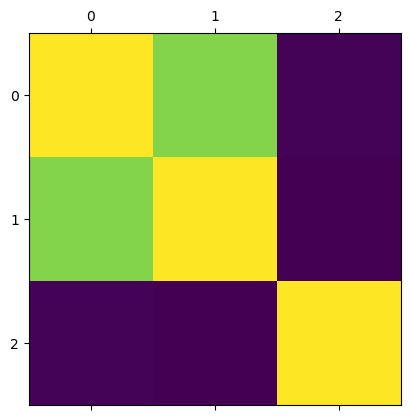

In [16]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

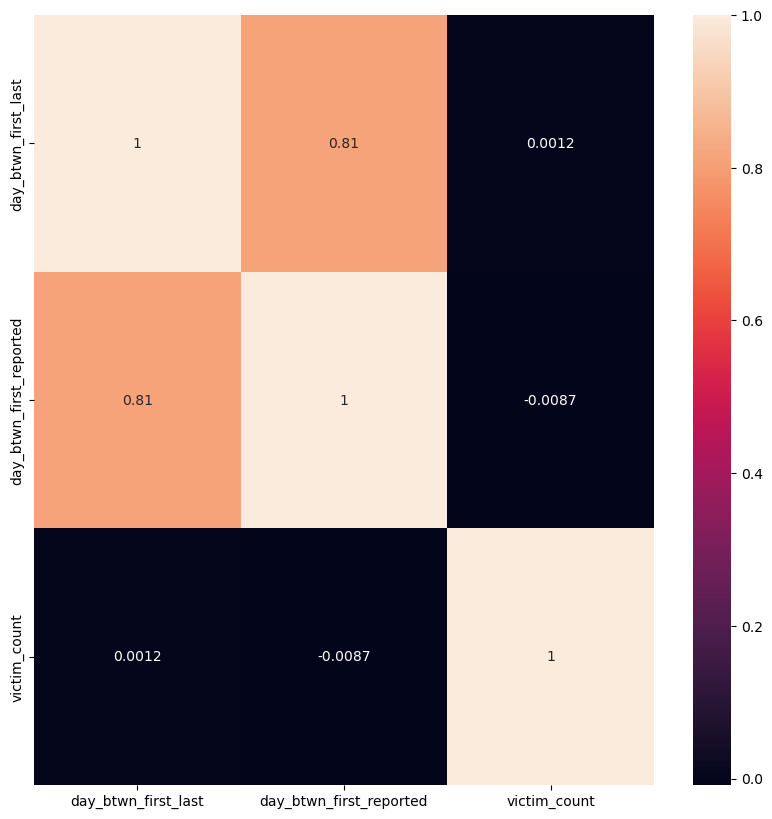

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Unsurprisingly, there's a strong relationship between when someone finds out a crime incident has occurred and when they report it. How many victims were involved basically has no impact on how long an incident is nor how long it takes to report. 

Text(0.5, 1.0, 'Correlation Matrix')

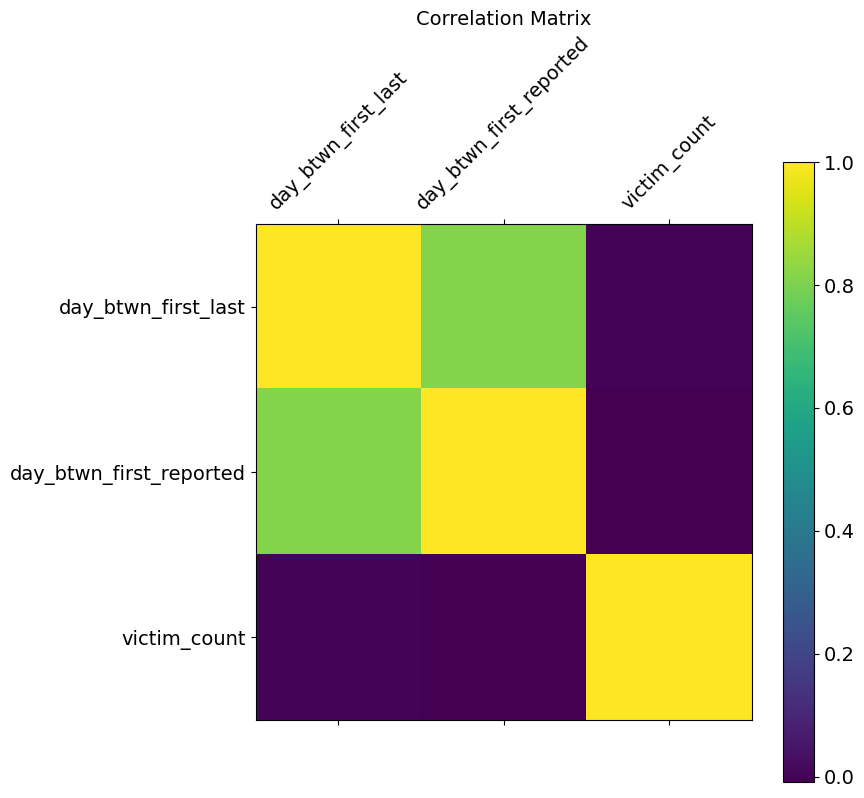

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Quick reminder: day_btwn_first_last refers to the days between the first date of incident and the last date of incident. day_btwn_first_reported refers to the days between the first date of incident and the date of when the crime was reported. 

It's of course good that the victim count is so low, but it makes me wonder how this would play out when it comes to sentencing as punishments are much harsher/longer if more people are impacted. I guess one thing I can't calculate with this dataset is how many of these are related. For example, how many of the auto thefts or burglaries are a part of a larger organization? Were these crimes committed by the same person/groups of people? I won't be exploring those details for the scope of this project, but it'd be interesting to find out later separately.

# Scatterplots [Step 4]

C:\Users\mduong\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


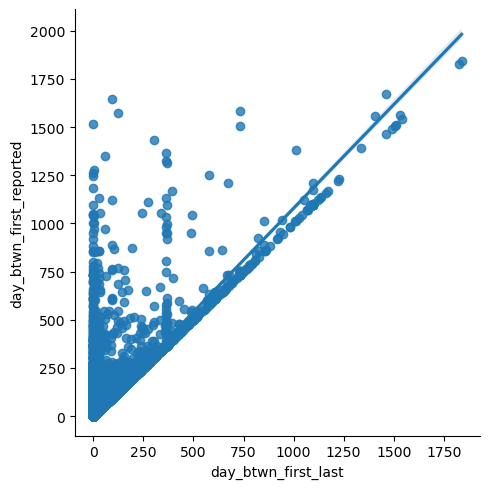

In [19]:
# Create a scatterplot for the "day_btwn_first_last" and "day_btwn_first_reported" columns in seaborn

sns.lmplot(x = 'day_btwn_first_last', y = 'day_btwn_first_reported', data = df_sub)

This comparison makes sense as people would more than likely report the crime right when they find out a crime has occurred. 

# Pair Plots [Step 5]

C:\Users\mduong\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


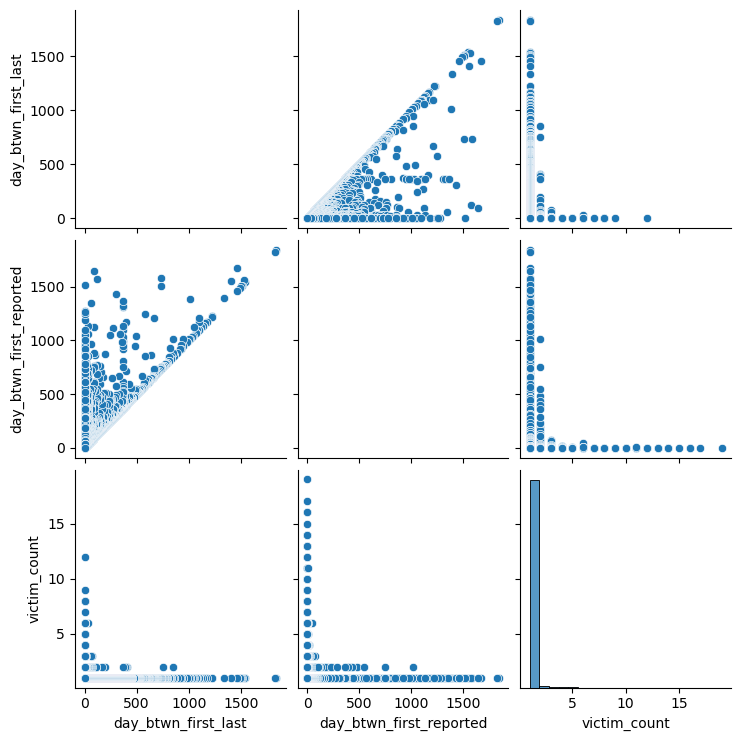

In [20]:
# Create a pair plot 

g = sns.pairplot(df_sub)

Unfortunately, the values I have do not provide much insight, but at least it was able to generate the respective visualizations. 

# Categorical Plots [Step 6]

<Axes: xlabel='day_btwn_first_last', ylabel='Count'>

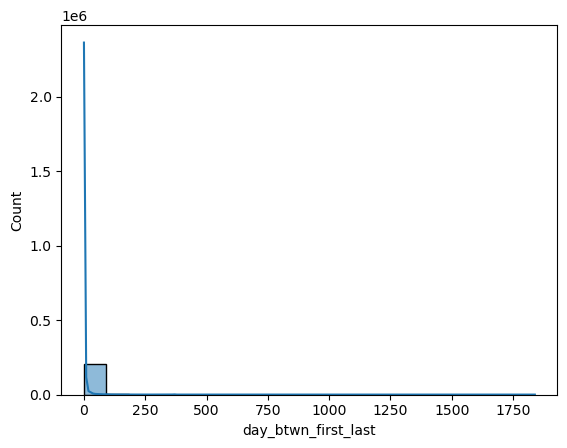

In [21]:
sns.histplot(df_crime['day_btwn_first_last'], bins = 20, kde = True)

In [22]:
df_crime.loc[df_crime['day_btwn_first_last'] < 20, 'Incident Length'] = 'Short'

In [23]:
df_crime.loc[(df_crime['day_btwn_first_last'] >= 20) & (df_crime['day_btwn_first_last'] < 50), 'Incident Length'] = 'Medium'

In [24]:
df_crime.loc[df_crime['day_btwn_first_last'] >= 50, 'Incident Length'] = 'Long'

In [25]:
df_crime['Incident Length'].value_counts(dropna = False)

Incident Length
Short     200501
NaN       170968
Medium      3327
Long        2997
Name: count, dtype: int64

NaN results are fine as not all crime incidents have a known end date. 

<Axes: xlabel='day_btwn_first_reported', ylabel='Count'>

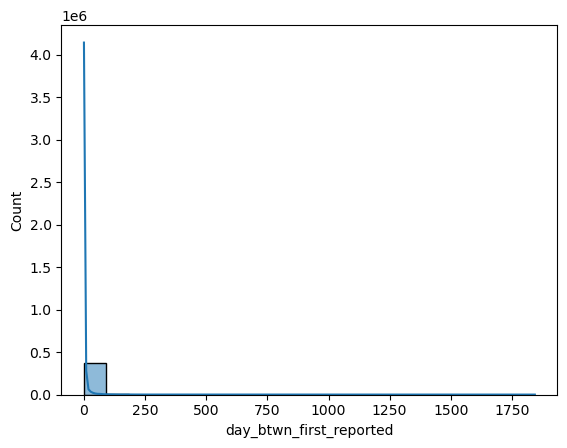

In [26]:
sns.histplot(df_crime['day_btwn_first_reported'], bins = 20, kde = True)

<Axes: xlabel='victim_count', ylabel='Count'>

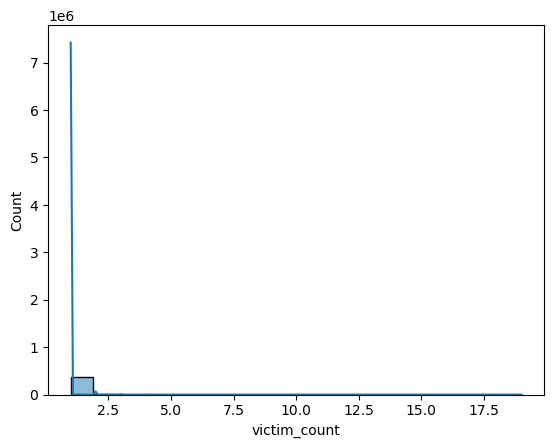

In [27]:
sns.histplot(df_crime['victim_count'], bins = 20, kde = True)

C:\Users\mduong\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


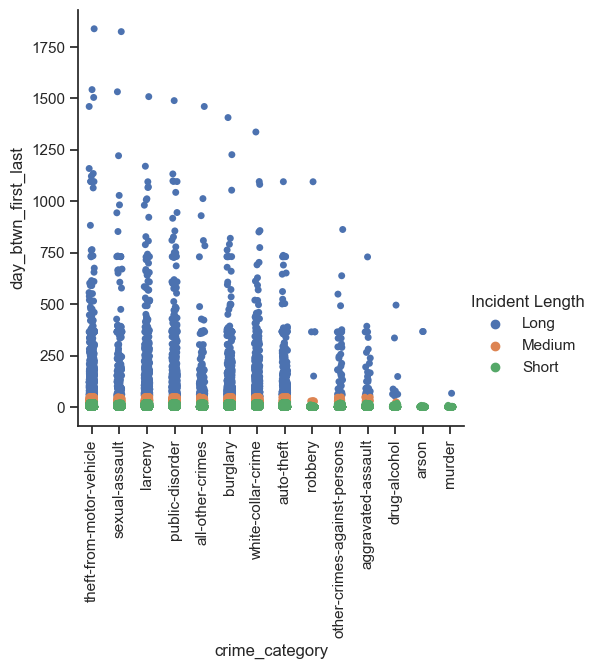

In [30]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="crime_category", y="day_btwn_first_last", hue="Incident Length", data=df_crime)
g.set_xticklabels(rotation=90)

Incident length for property crimes can be longer than most violent/persons crimes, aside from sexual assault crimes, which makes sense. For theft from motor vehicle, people may not know something is missing until it's time to use it, and as for sex crimes, victims are typically more hesistant to report a crime occurred due to fear of retaliation and/or not being believed by law enforcement. 

# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration. [Step 7]

As discussed, given that I have limited continuous/qualitative data points, unfortunately the visualizations generated are not as insightful, but I plan on performing additional analysis in Excel to answer the questions I asked in the previous task. That being said, however, I think the categorical plot is insightful. It fits with the hypothesis I have below about property crimes having a longer incident length than persons crimes, which makes sense as violent crimes happen quickly/right away, while property crimes may take longer to even identify. 

# Define any hypotheses that you can at this point. You’ll be testing these later on. [Step 8]

Property crimes have a longer incident length than persons/violent crimes. 